# Titanic Passenger Survival

By: Tal Cordova

## 1. Get Familiar with the Data

First. I'd like to understand the data, columns, distributions and etc.

The data consists of 891 samples of Titanic Passsengers, each with different features:
* `Pclass` - ticket class. An ordinal variable with three categories: 1, 2, 3.
* `Name` - name of passenger.
* `Sex` - is the passenger Male or Female.
* `Age` - the age of the passenger during the Titanic disaster - numeric variable.
* `SibSp` - # of siblings / spouses aboard the Titanic - numeric feature.
* `Parch` - # of parents / children aboard the Titanic - numeric feature.
* `Ticket` - ticket number - a String.
* `Fare` - Passenger fare - numeric feature.
* `Cabin` - Cabin number
* `Embarked` - the port the passenger has ambarked on - a caterogical feature with three categories (Q, C, S),

The target feature is `Survived` - classify whether a passenger survived or not (0 or 1).

The train set has 891 rows with 12 columns.

The test set has 418 rows with 11 columns (without the `Survived` column).

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1.1 Cehck the Target Variable Distribution

First, I want to see the values of the target variable - `survived`.

In [5]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In the training set, about 62% did not survive and 38% did survive. To start, I will address this dataset as a balanced one.

What are the survival rates, given certain features?



### 1.2 Distribution of the Independent Features

In [6]:
# Sex

women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

women = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_women = sum(women)/len(women)

print("% of men who survived:", rate_women)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [7]:
# Pclass
class_1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class_1)/len(class_1)

print("% of class 1 survivors:", rate_class1)

class_2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class_2)/len(class_2)

print("% of class 2 survivors:", rate_class2)

class_3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class_3)/len(class_3)

print("% of class 3 survivors:", rate_class3)

% of class 1 survivors: 0.6296296296296297
% of class 2 survivors: 0.47282608695652173
% of class 3 survivors: 0.24236252545824846


In [8]:
# SibSp value
train_data.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
for i in [0, 1, 2, 3, 4, 5, 8]:
    classSp = train_data.loc[train_data.SibSp == i]["Survived"]
    rate_classSp = sum(classSp)/len(classSp)

    print(f"% of class {i} SP survivors: {rate_classSp}")

% of class 0 SP survivors: 0.34539473684210525
% of class 1 SP survivors: 0.5358851674641149
% of class 2 SP survivors: 0.4642857142857143
% of class 3 SP survivors: 0.25
% of class 4 SP survivors: 0.16666666666666666
% of class 5 SP survivors: 0.0
% of class 8 SP survivors: 0.0


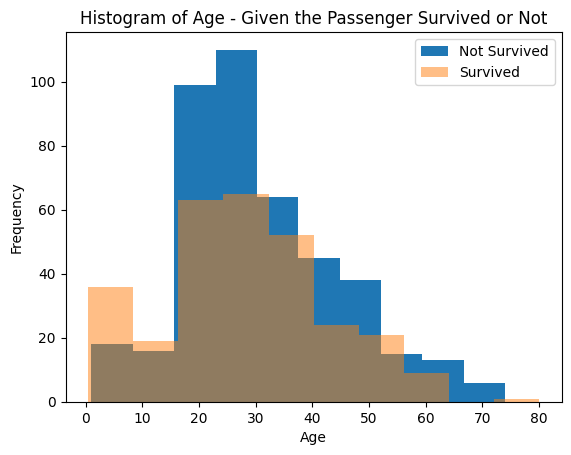

In [10]:
# Age
import matplotlib.pyplot as plt
age_0 = train_data[train_data["Survived"] == 0]["Age"]
age_1 = train_data[train_data["Survived"] == 1]["Age"]

plt.hist(age_0, label = 'Not Survived')
plt.hist(age_1, label = 'Survived', alpha = 0.5)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age - Given the Passenger Survived or Not")
plt.legend()
plt.show()

In [11]:
age_0.describe(), age_1.describe()

(count    424.000000
 mean      30.626179
 std       14.172110
 min        1.000000
 25%       21.000000
 50%       28.000000
 75%       39.000000
 max       74.000000
 Name: Age, dtype: float64,
 count    290.000000
 mean      28.343690
 std       14.950952
 min        0.420000
 25%       19.000000
 50%       28.000000
 75%       36.000000
 max       80.000000
 Name: Age, dtype: float64)

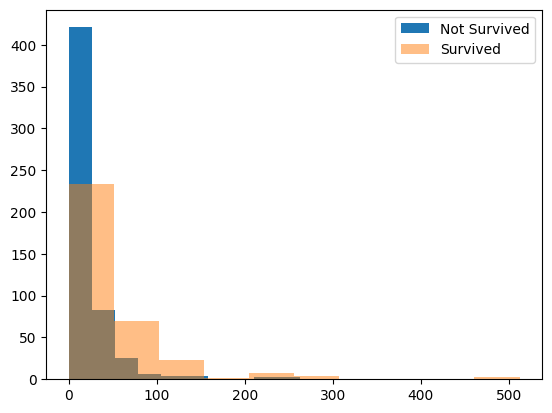

In [12]:
# Fare
fare_0 = train_data[train_data["Survived"] == 0]["Fare"]
fare_1 = train_data[train_data["Survived"] == 1]["Fare"]

plt.hist(fare_0, label = 'Not Survived')
plt.hist(fare_1, label = 'Survived', alpha = 0.5)
plt.legend()
plt.show()# 

In [13]:
train_data.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
# Parch
for i in range(7):
    classParch = train_data.loc[train_data.Parch == i]["Survived"]
    rate_classParch = sum(classParch)/len(classParch)

    print(f"% of class {i} Parch survivors: {rate_classParch}")

% of class 0 Parch survivors: 0.34365781710914456
% of class 1 Parch survivors: 0.5508474576271186
% of class 2 Parch survivors: 0.5
% of class 3 Parch survivors: 0.6
% of class 4 Parch survivors: 0.0
% of class 5 Parch survivors: 0.2
% of class 6 Parch survivors: 0.0


In [15]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
# Embark
ports = ['S', 'C', 'Q']
for port in ports:
    classPort = train_data.loc[train_data.Embarked == port]["Survived"]
    rate_classPort = sum(classPort)/len(classPort)

    print(f"% of class {port} Parch survivors: {rate_classPort}")

% of class S Parch survivors: 0.33695652173913043
% of class C Parch survivors: 0.5535714285714286
% of class Q Parch survivors: 0.38961038961038963


We can see that the features that seperate the data the most are `Sex`, `Pclass`, `SibSp` and `Embarked`.

Let's try and build a model based on these.

First, I'd like to know if there are missing values. and how man:

### 1.3 Handle Missing Values

I want to see which features has missing values, and what is their frequency. According to that, I will be able to understand how to handle the missing values.

In [17]:
# Find missing values
missing_values = train_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Total missing values: 866


In [18]:
# Find missing values in test data
missing_values = test_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
Total missing values: 414


#### 1.3.1 Cabin

We can see that the `Cabin` feature has many missing values (most of it) - imputing this column might be tricky, since it is hard to predict, or give a mean or median value.

The approach I will choose is not filling the cabins, but filling in the decks - the first letter in each value represents the deck that the passenger has been on.

The decks might indicate the survival rate.

I assume that each deck belongs to a different class, so to see if this is true, and impute the decks in the most accurate way, I will see the distribution of classses in each deck.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
train_data['Cabin'].fillna('M', inplace=True)

temp_df = pd.DataFrame(columns = ['Deck', 'Percentage', 'Deck_Total'])

# Extract deck information
train_data['Deck'] = train_data['Cabin'].str[0]
train_data

/tmp/ipykernel_18/1524239634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Cabin'].fillna('M', inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,M,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [21]:
combination_counts = train_data.groupby(['Deck', 'Pclass']).size().reset_index(name='Count')

# Create a DataFrame with all combinations of deck and class
all_combinations = pd.DataFrame(
    [(deck, cls) for deck in train_data['Deck'].unique() for cls in train_data['Pclass'].unique()],
    columns=['Deck', 'Pclass']
)

# Merge the combination counts with all combinations DataFrame
result_df = pd.merge(all_combinations, combination_counts, on=['Deck', 'Pclass'], how='left').fillna(0)
deck_totals = result_df.groupby('Deck')['Count'].transform('sum')
result_df['Percent'] = (result_df['Count'] / deck_totals) * 100

result_df

,Deck,Pclass,Count,Percent
0,M,3,479.0,69.723435
1,M,1,40.0,5.822416
2,M,2,168.0,24.454148
3,C,3,0.0,0.000000
4,C,1,59.0,100.000000
5,C,2,0.0,0.000000
6,E,3,3.0,9.375000
7,E,1,25.0,78.125000
8,E,2,4.0,12.500000
9,G,3,4.0,100.000000


In [22]:
pivot_df = result_df.pivot(index='Deck', columns='Pclass', values='Percent').fillna(0)
pivot_df

Pclass,1,2,3
Deck,,,
A,100.000000,0.000000,0.000000
B,100.000000,0.000000,0.000000
C,100.000000,0.000000,0.000000
D,87.878788,12.121212,0.000000
E,78.125000,12.500000,9.375000
F,0.000000,61.538462,38.461538
G,0.000000,0.000000,100.000000
M,5.822416,24.454148,69.723435
T,100.000000,0.000000,0.000000


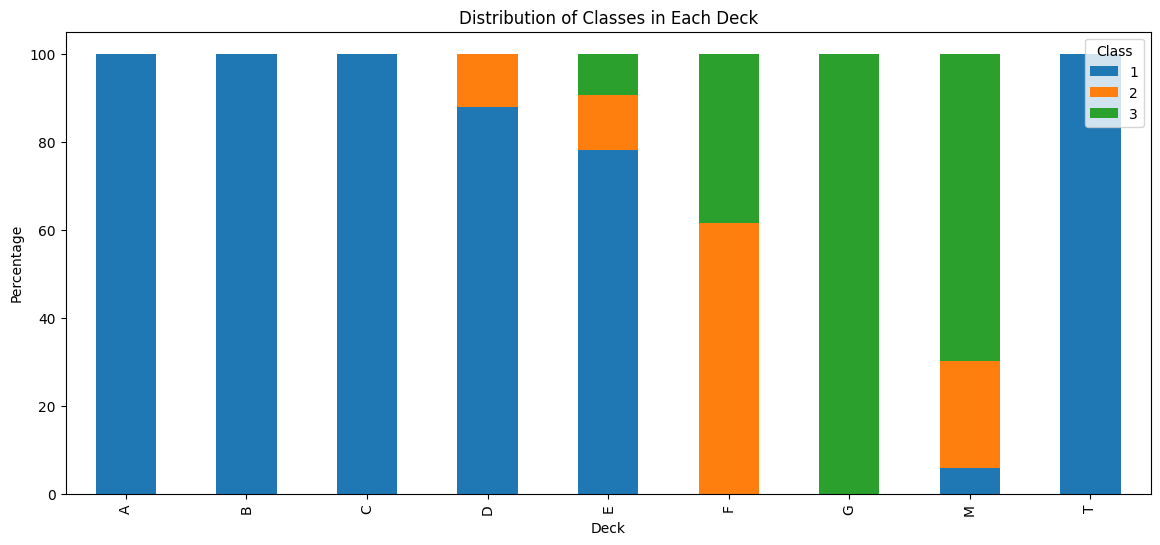

In [23]:
# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Distribution of Classes in Each Deck')
plt.xlabel('Deck')
plt.ylabel('Percentage')
plt.legend(title='Class', loc='upper right')
plt.show()

We can see that: 
* In decks A, B, C and T they are all 1st class. Since deck T is only one sample, we will change it to A.
* In deck D, 88% is first class and 12% is second class.
* In deck E there are 78% first class, 12.5% second class and 9.5% third class.
* In deck F there 62% are second class passengers and 38% are third class passengers.
* In deck G all the passengers are third class passengers.
* In the missing deck (M) 6% are first class passengers, 24% are second class passengers and 70% are third class passengers.

The next I will check is the rate of survival in eah deck to see if it will have an effect.




In [24]:
# Passenger in the T deck is changed to A
idx = train_data[train_data['Deck'] == 'T'].index
train_data.loc[idx, 'Deck'] = 'A'

In [25]:
combination_counts = train_data.groupby(['Deck', 'Survived']).size().reset_index(name='Count')

# Create a DataFrame with all combinations of deck and class
all_combinations = pd.DataFrame(
    [(deck, cls) for deck in train_data['Deck'].unique() for cls in train_data['Survived'].unique()],
    columns=['Deck', 'Survived']
)

# Merge the combination counts with all combinations DataFrame
result_sur_df = pd.merge(all_combinations, combination_counts, on=['Deck', 'Survived'], how='left').fillna(0)
deck_totals = result_sur_df.groupby('Deck')['Count'].transform('sum')
result_sur_df['Percent'] = (result_sur_df['Count'] / deck_totals) * 100

result_sur_df

,Deck,Survived,Count,Percent
0,M,0,481,70.014556
1,M,1,206,29.985444
2,C,0,24,40.677966
3,C,1,35,59.322034
4,E,0,8,25.000000
5,E,1,24,75.000000
6,G,0,2,50.000000
7,G,1,2,50.000000
8,D,0,8,24.242424
9,D,1,25,75.757576


In [26]:
pivot_df = result_sur_df.pivot(index='Deck', columns='Survived', values='Percent').fillna(0)
pivot_df

Survived,0,1
Deck,,
A,56.250000,43.750000
B,25.531915,74.468085
C,40.677966,59.322034
D,24.242424,75.757576
E,25.000000,75.000000
F,38.461538,61.538462
G,50.000000,50.000000
M,70.014556,29.985444


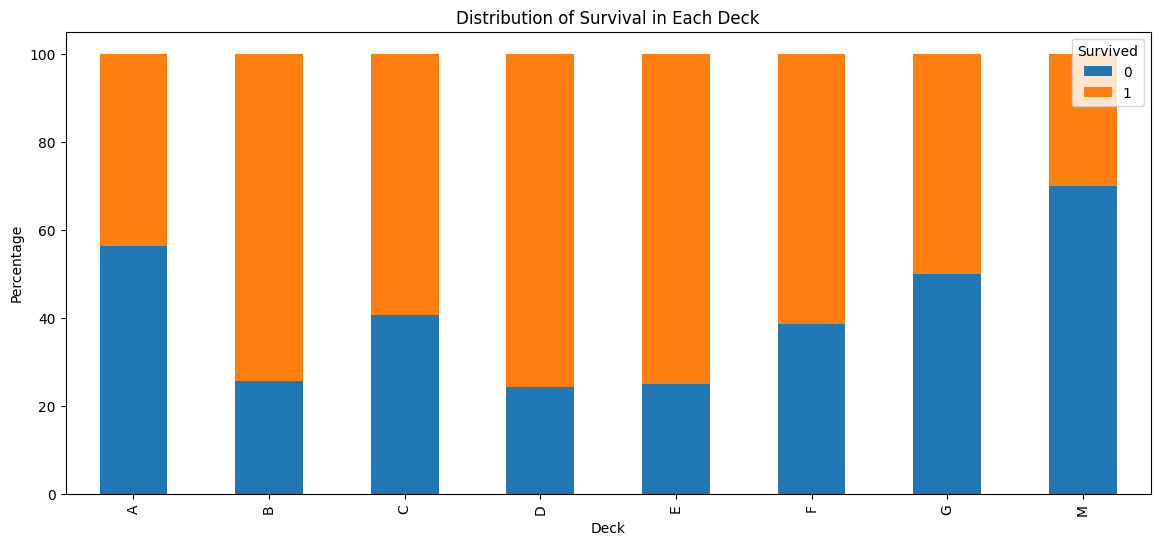

In [27]:
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 6))
plt.title('Distribution of Survival in Each Deck')
plt.xlabel('Deck')
plt.ylabel('Percentage')
plt.legend(title='Survived', loc='upper right')
plt.show()

There is a different survival rate for each deck, so this might be a good feature.

In [28]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,M,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


For the test data, I will make a similar handling. Since the decks are derived directly from the Cabin, I am not worried about data leakage.

In [29]:
test_data['Cabin'].fillna('M', inplace=True)
test_data['Deck'] = test_data['Cabin'].str[0]
test_data

/tmp/ipykernel_18/2992704947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Cabin'].fillna('M', inplace=True)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,M,Q,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,M,S,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,M,Q,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,M,S,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,M
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,M
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,M


#### 1.3.2 Age
Another column that has many missing values is `Age`. We can impute the missing values with the mean, median or most frequent value.

To more accurately impute the `Age`, I can check the correlation between age and other features and divide them into groups. For each group I can impute the corresponding mean or median.

In [30]:
corr_df = train_data.drop(columns = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck'], axis = 1)

# Calculate correlation
correlation = corr_df.corr().abs().unstack().sort_values(ascending = False).reset_index()
correlation

correlation.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
correlation[correlation['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
4,Age,Age,1.000000
10,Age,Pclass,0.369226
15,Age,SibSp,0.308247
20,Age,Parch,0.189119
24,Age,Fare,0.096067
31,Age,Survived,0.077221


`Age` has relatively high correlation with `Pclass`, so we can impute based on the median age in each class.

To be even more accurate, we will impute according to `Sex` groups in the classes.

In [31]:
# pclass - sex
age_by_pclass_sex = train_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked', 'Deck'], axis = 1).groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(train_data['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [32]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
medians = train_data.groupby(['Sex', 'Pclass'])['Age'].transform('median')
train_data['Age'] = train_data['Age'].fillna(medians)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [33]:
missing_values = train_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Deck           0
dtype: int64
Total missing values: 2


For the test set, I will impute the missing `Age` values using the medians from the train dataset, to prevent data leakage.

In [34]:
for index, row in test_data.iterrows():
    if pd.isnull(row['Age']):
        sex = row['Sex']
        pclass = row['Pclass']
        if (sex, pclass) in age_by_pclass_sex:
            test_data.at[index, 'Age'] = age_by_pclass_sex[(sex, pclass)]
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,M,Q,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,M,S,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,M,Q,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,M,S,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,8.0500,M,S,M
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,M
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,8.0500,M,S,M


In [35]:
missing_values = test_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
Deck           0
dtype: int64
Total missing values: 1


#### 1.3.3 Embarked

In the embarked column, there are two missing values, let's see which passengers these are

In [36]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,B


A brief google search led me [here](https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html), where I learned that Amelie Icard was the maid of Mrs. George Nelson Stone, and that they both boarded in Southampton (S), so I will  impute those missing values with S.

In [37]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')
missing_values = train_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64
Total missing values: 0


Now, there are no missing values in the train dataset.

### 1.3.4 Fare

In the test set, however, there is a missing value in the `Fare` column. Let's check which record is it:

In [38]:
test_data[test_data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,M,S,M


Since it makes sense that `Fare` and `Pclass` are highly correlated, I will use the median of `Pclass = 3` from the train set.

In [39]:
class_3_data = train_data[train_data['Pclass'] == 3]
median_fare_class_3 = class_3_data['Fare'].median()

test_data['Fare'] = train_data['Fare'].fillna(medians)

missing_values = test_data.isnull()

# Count missing values
missing_counts = missing_values.sum()

print("Missing values per column:")
print(missing_counts)

total_missing = missing_counts.sum()
print("Total missing values:", total_missing)

Missing values per column:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64
Total missing values: 0


Now there are no missing values in the test set as well.

### 1.4 Correlations

I want to see the correlation of different features with the target feature:

In [40]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,M
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C


In [41]:
data = pd.get_dummies(train_data, columns = ['Sex', 'Deck', 'Embarked'])
data = data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
data.rename(columns = {'level_0': 'Feature_1', 'level_1': 'Feature_2', 0:'Correlation_Coefficient'}, inplace = True)
data

,Feature_1,Feature_2,Correlation_Coefficient
0,Survived,Survived,1.000000
1,Deck_C,Deck_C,1.000000
2,SibSp,SibSp,1.000000
3,Parch,Parch,1.000000
4,Fare,Fare,1.000000
...,...,...,...
356,Survived,Embarked_Q,0.003650
357,SibSp,Deck_F,0.001706
358,Deck_F,SibSp,0.001706
359,Deck_G,SibSp,0.001402


In [42]:
data.drop(data.iloc[1::2].index, inplace = True)
data = data.drop(data[data['Correlation_Coefficient'] == 1].index)
data

,Feature_1,Feature_2,Correlation_Coefficient
20,Sex_male,Sex_female,1.000000
22,Embarked_C,Embarked_S,0.782742
24,Pclass,Deck_M,0.725541
26,Fare,Pclass,0.549500
28,Sex_male,Survived,0.543351
...,...,...,...
352,Deck_F,Deck_G,0.008171
354,Embarked_Q,Deck_F,0.004113
356,Survived,Embarked_Q,0.003650
358,Deck_F,SibSp,0.001706


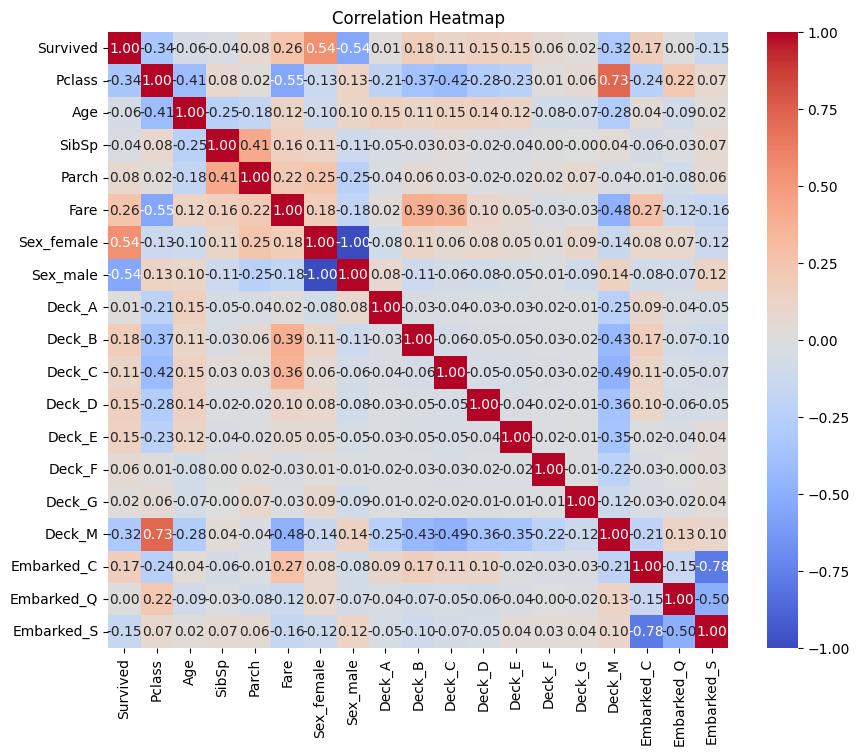

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

heat_data = pd.get_dummies(train_data, columns = ['Sex', 'Deck', 'Embarked'])
heat_data.head()
heat_data = heat_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(heat_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.show()

### 1.4.1 Continous Features Correlation with Target Feature

/tmp/ipykernel_18/1880829195.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1880829195.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar

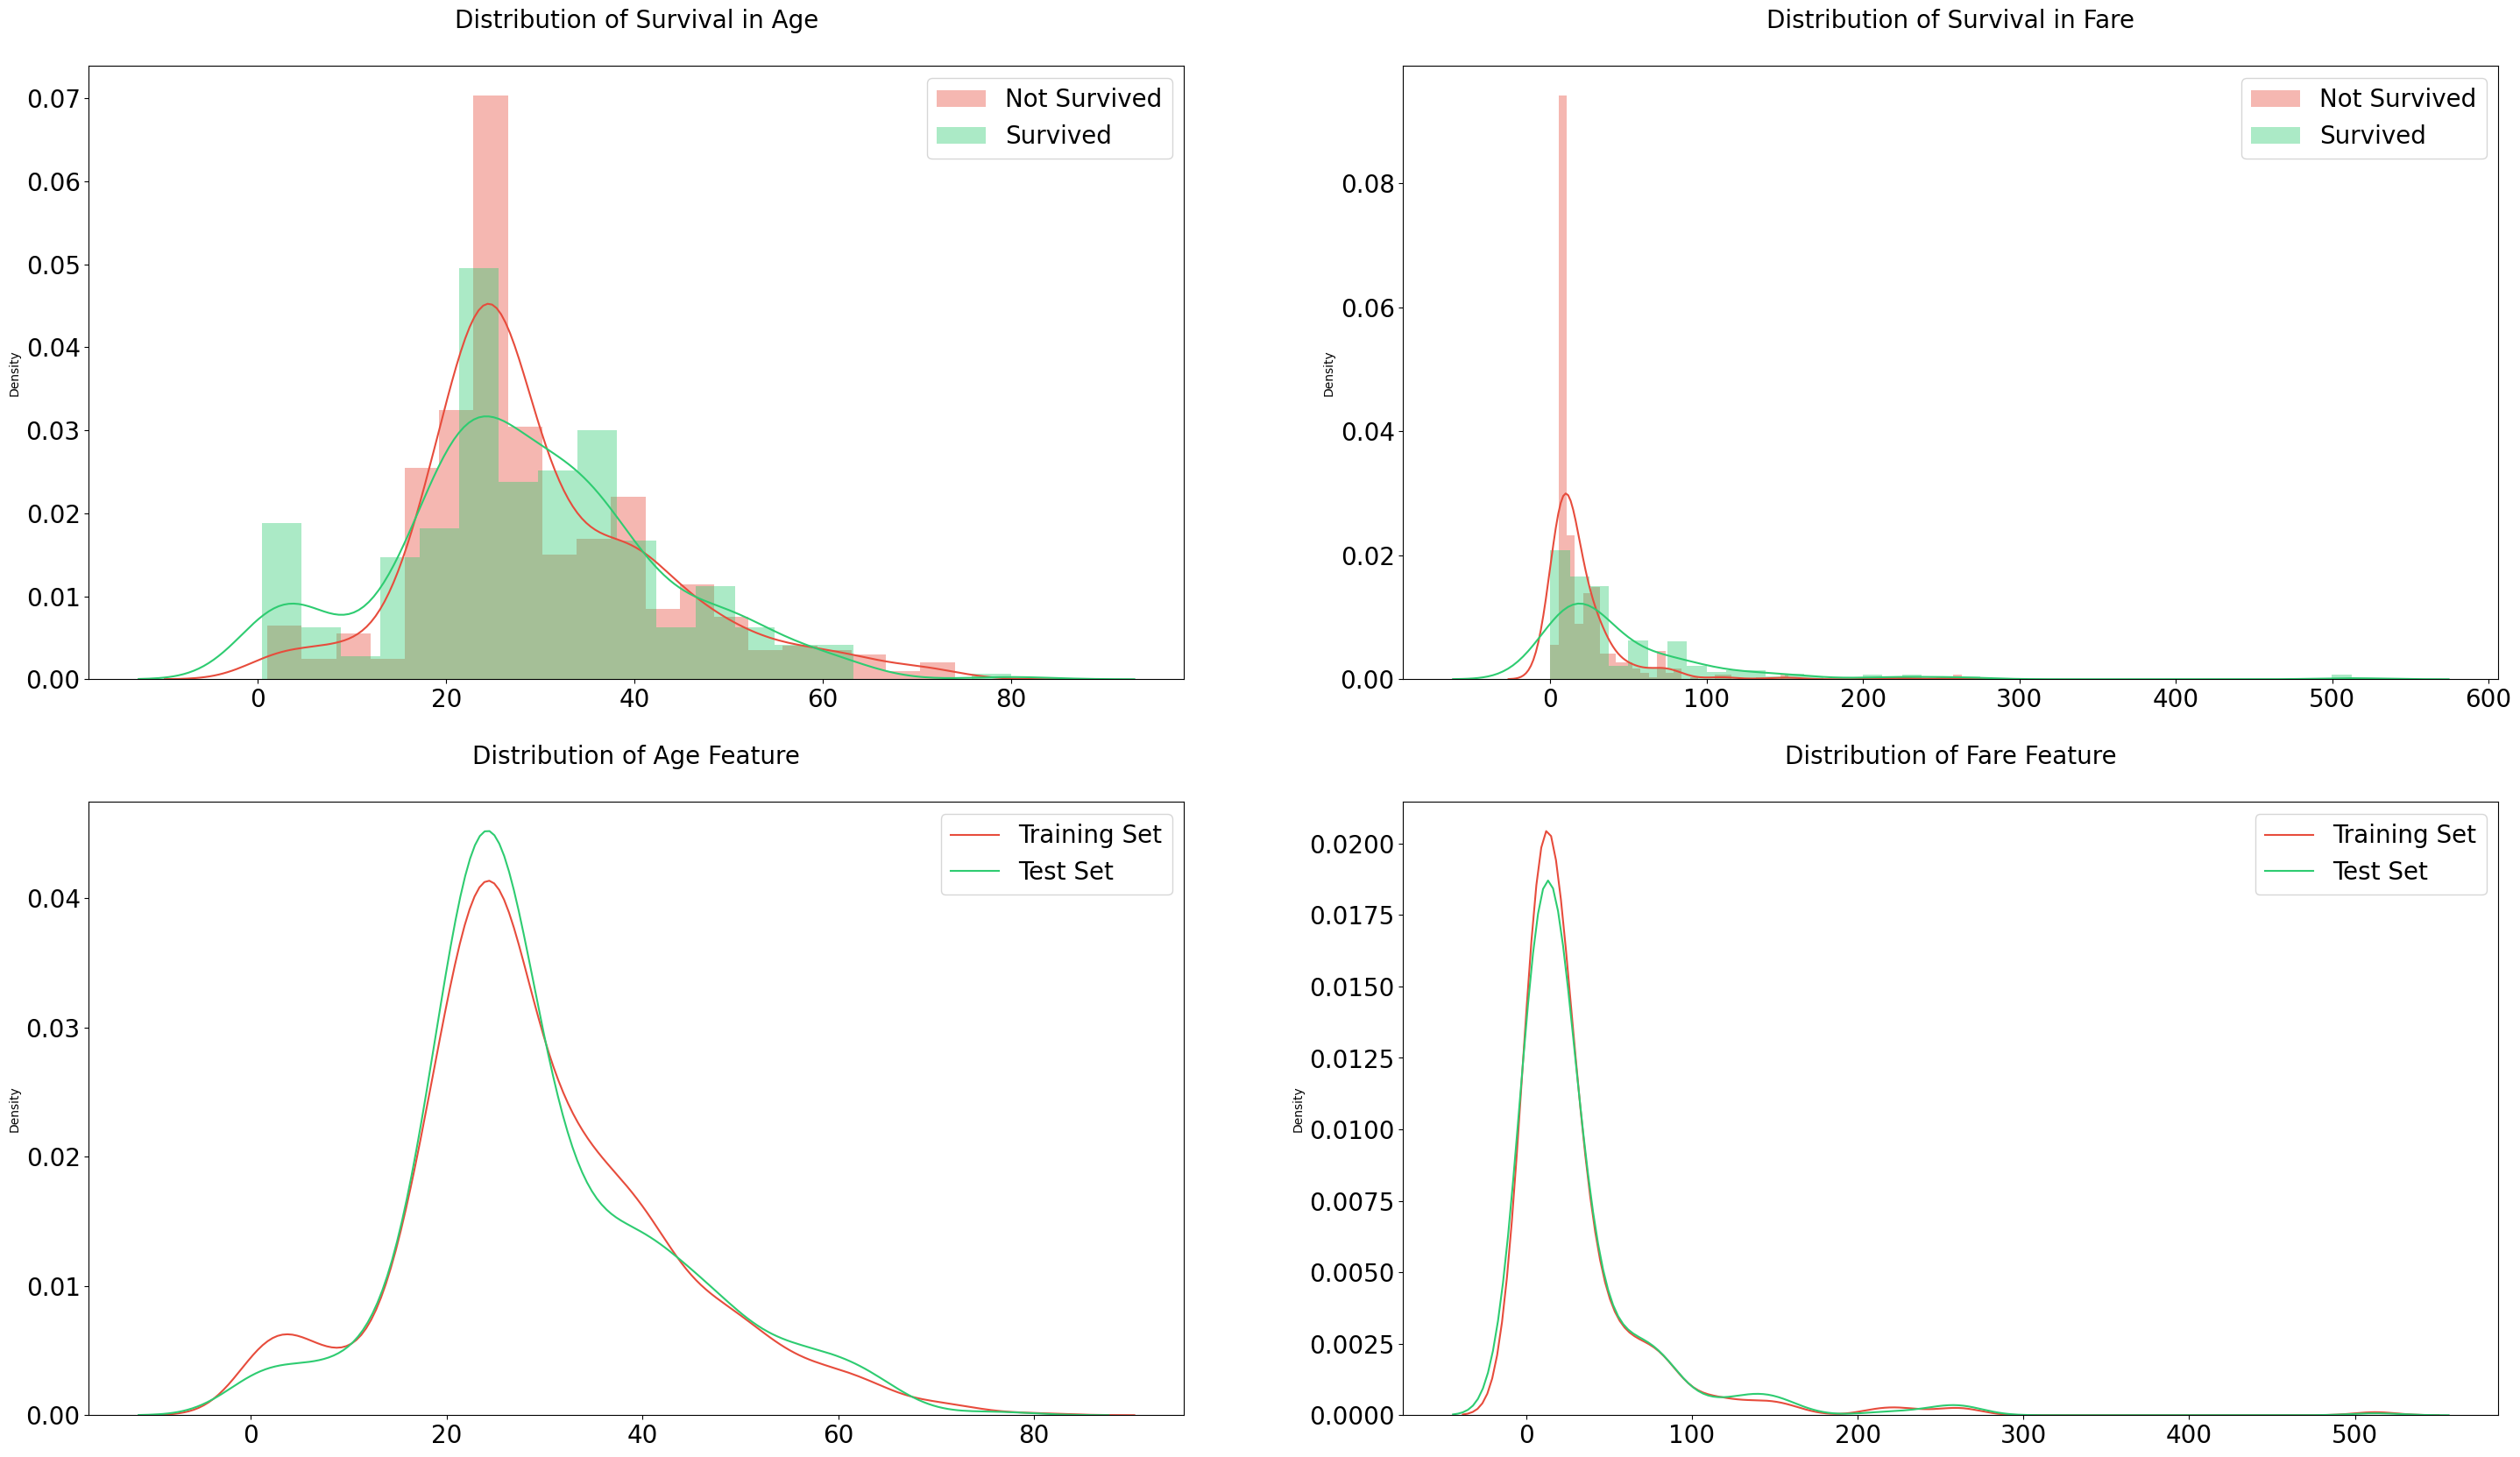

In [44]:
cont_features = ['Age', 'Fare']
surv = train_data['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):    
    # Distribution of survival in feature
    sns.distplot(train_data[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
    sns.distplot(train_data[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])
    
    # Distribution of feature in dataset
    sns.distplot(train_data[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(test_data[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

* In the `Age` feature we can see that survival rate is higher for age under 15.
* In the `Fare` feature we can see that survival rate is higher on the edges of the curve.

### 1.4.2 Categorical Features Correlation with Target Feature

/tmp/ipykernel_18/2469640489.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
/tmp/ipykernel_18/2469640489.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
/tmp/ipykernel_18/2469640489.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)
/tmp/ipykernel_18/2469640489.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


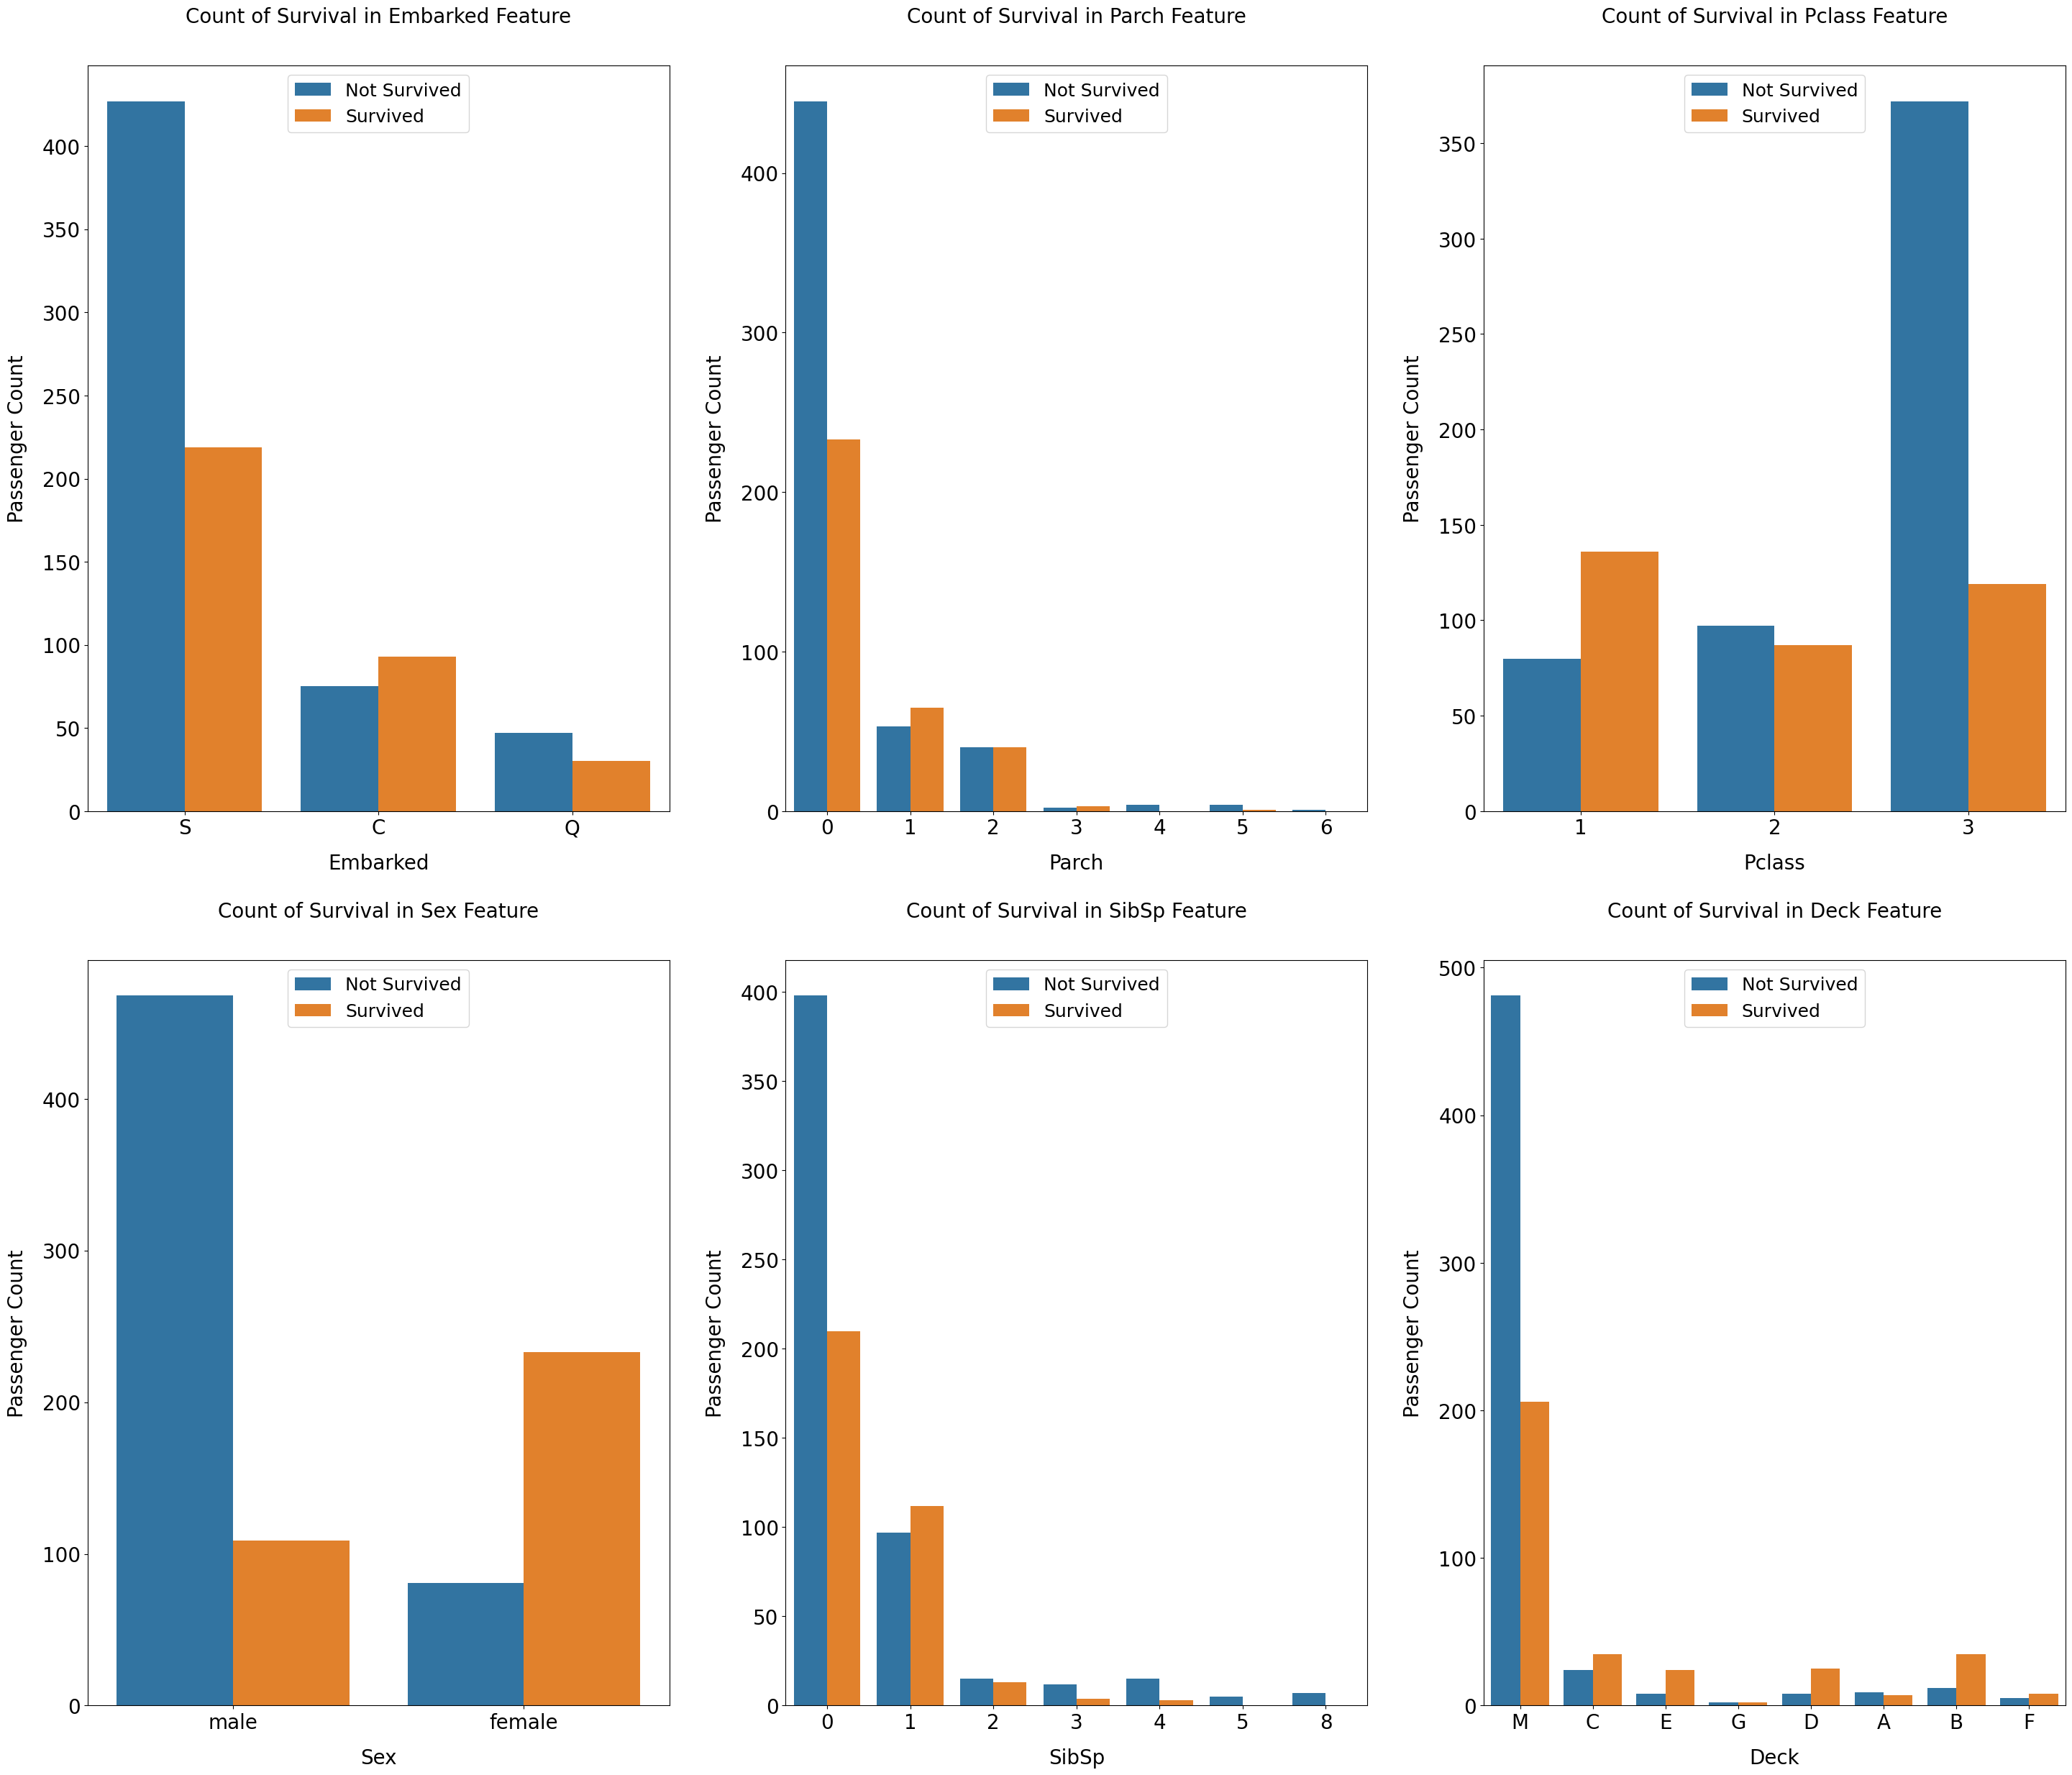

In [45]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Deck']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

On the categorical features we can see:
* Passengers who embarked at Southampton (S) has lower survival rate than Cherbourg and Queenstown.
* If there were no parents or children (`Parch = 0`) the survival rate was lower.
* In the `Pclass` feature, the third class has the lowest survival rate.
* Females are more likely to susrvive than males.
* Passenger with no siblings or spouses (`Sibsp` = 0) had low survival rate.
* People with no reported deck (`Deck = M`) had the lowest survival rate.

## 2 Feature Engineering

In this section I will attempt to create new features and see if they lead to new insights in the dataset.


### 2.1 Check For Matching Categories

One of the things I notices is that `Parch` has categories in the test set that do not appear in the train set (such as `Parch == 9`).

I want to see the distribution of values in this feature, and according to that decide which categories I should unify.


In [46]:
# condition = test_data['Parch'] > 2
# # Update values greater than 2 to 'other'
# test_data.loc[condition, 'Parch'] = 'other'

# # Display the modified dataframe
# test_data

### 2.2 Family Size

Another feature I want to make is the `FamilySize` which will be a combination of `SibSp` and `Parch` - `SibSp + Parch + 1` (the +1 is for the current passenger)

In [47]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,M,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1


I will make the same treatment for the test set:

In [48]:
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.2500,M,Q,M,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,71.2833,M,S,M,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,7.9250,M,Q,M,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,53.1000,M,S,M,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,8.0500,M,S,M,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,A.5. 3236,0.0000,M,S,M,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,7.9250,C105,C,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,8.0500,M,S,M,1
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,359309,32.5000,M,S,M,1


In [49]:
test_data.FamilySize.value_counts(), train_data.FamilySize.value_counts()

(FamilySize
 1     253
 2      74
 3      57
 4      14
 5       7
 7       4
 11      4
 6       3
 8       2
 Name: count, dtype: int64,
 FamilySize
 1     537
 2     161
 3     102
 4      29
 6      22
 5      15
 7      12
 11      7
 8       6
 Name: count, dtype: int64)

/tmp/ipykernel_18/2806768823.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


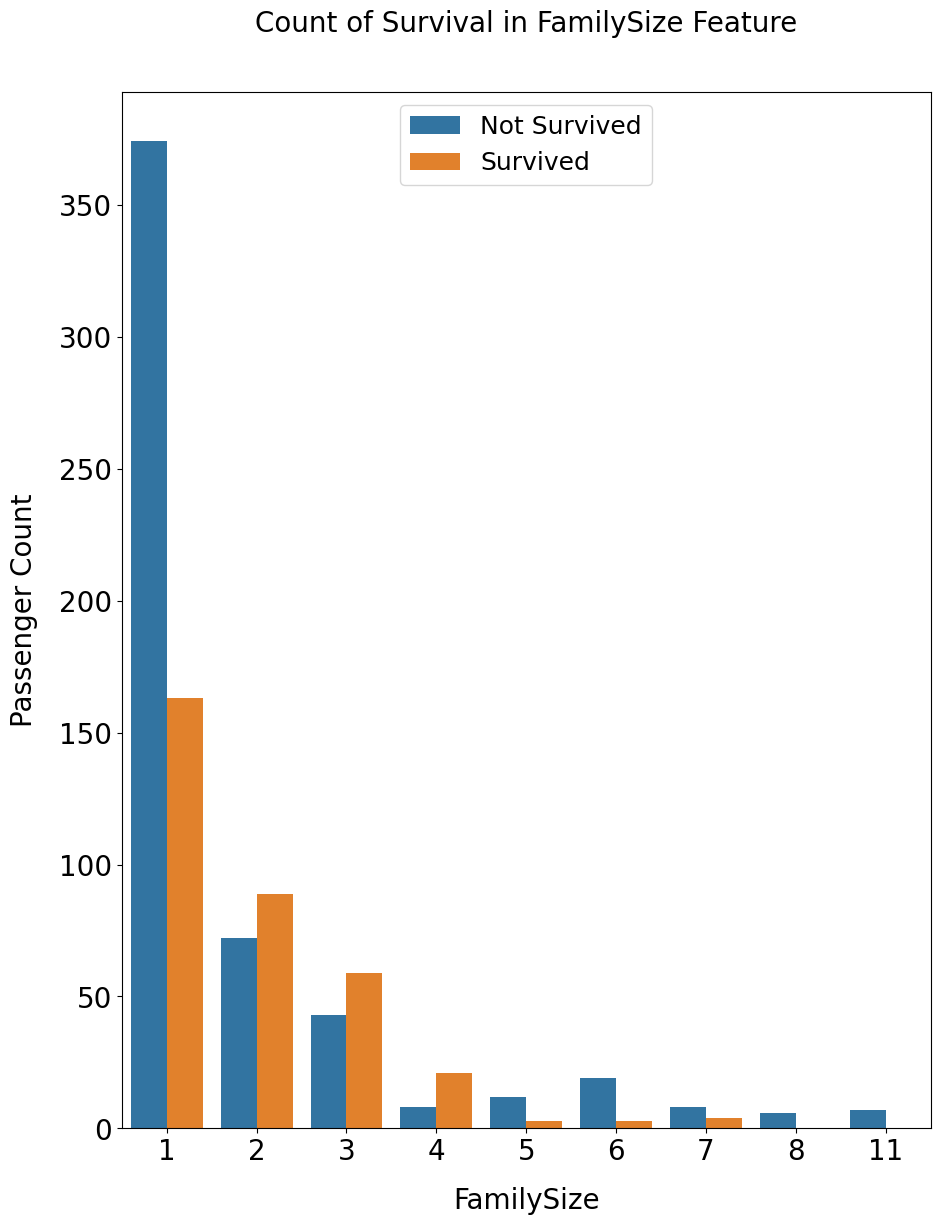

In [50]:
cat_features = ['FamilySize']

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

We can see that for passengers who travel alone has the lowest survival rate.

### 2.3 Title Feature

From the `Name` feature we can extract the title of the passenger - which might give us a good idea on survival rate.

In [51]:
train_data['Title'] = train_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,M,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1,Mr


In [52]:
train_data.Title.value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

* The titles `Mlle` and `Mme` are in fact `Miss` and `Mrs`, repectively - so we can replace these values to avoid too many categories
* The title `Ms` does not specify if a woman is married or not - but since the only passenger that answers this title has no family (the `FamilySize = 1`), I will assume she was unmarried, and replse `Ms` with `Miss`
* The other titles with less then 10 samples are all nobles (Countess, Sir, Lady, Don, Johnkheer), military ranks (Major, Col, Capt), Doctors (Dr) or Reverends (Rev) - so I will unite them to a single category of `Doctor/Military/Nobles/Clergy`.

In [53]:
train_data.loc[train_data['Title'] == 'Mlle', 'Title'] = 'Miss'
train_data.loc[train_data['Title'] == 'Mme', 'Title'] = 'Mrs'
train_data.loc[train_data['Title'] == 'Ms', 'Title'] = 'Miss'

values_to_replace = ['Dr', 'Rev', 'Major', 'Colonel', 'the Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Col']
# Define the replacement value
new_value = 'Doctor/Military/Nobles/Clergy'
# Replace values in column 'A' with new_value if they are in values_to_replace list
train_data['Title'] = train_data['Title'].replace(values_to_replace, new_value)
train_data.Title.value_counts()

Title
Mr                               517
Miss                             185
Mrs                              126
Master                            40
Doctor/Military/Nobles/Clergy     23
Name: count, dtype: int64

/tmp/ipykernel_18/2942804639.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, i)


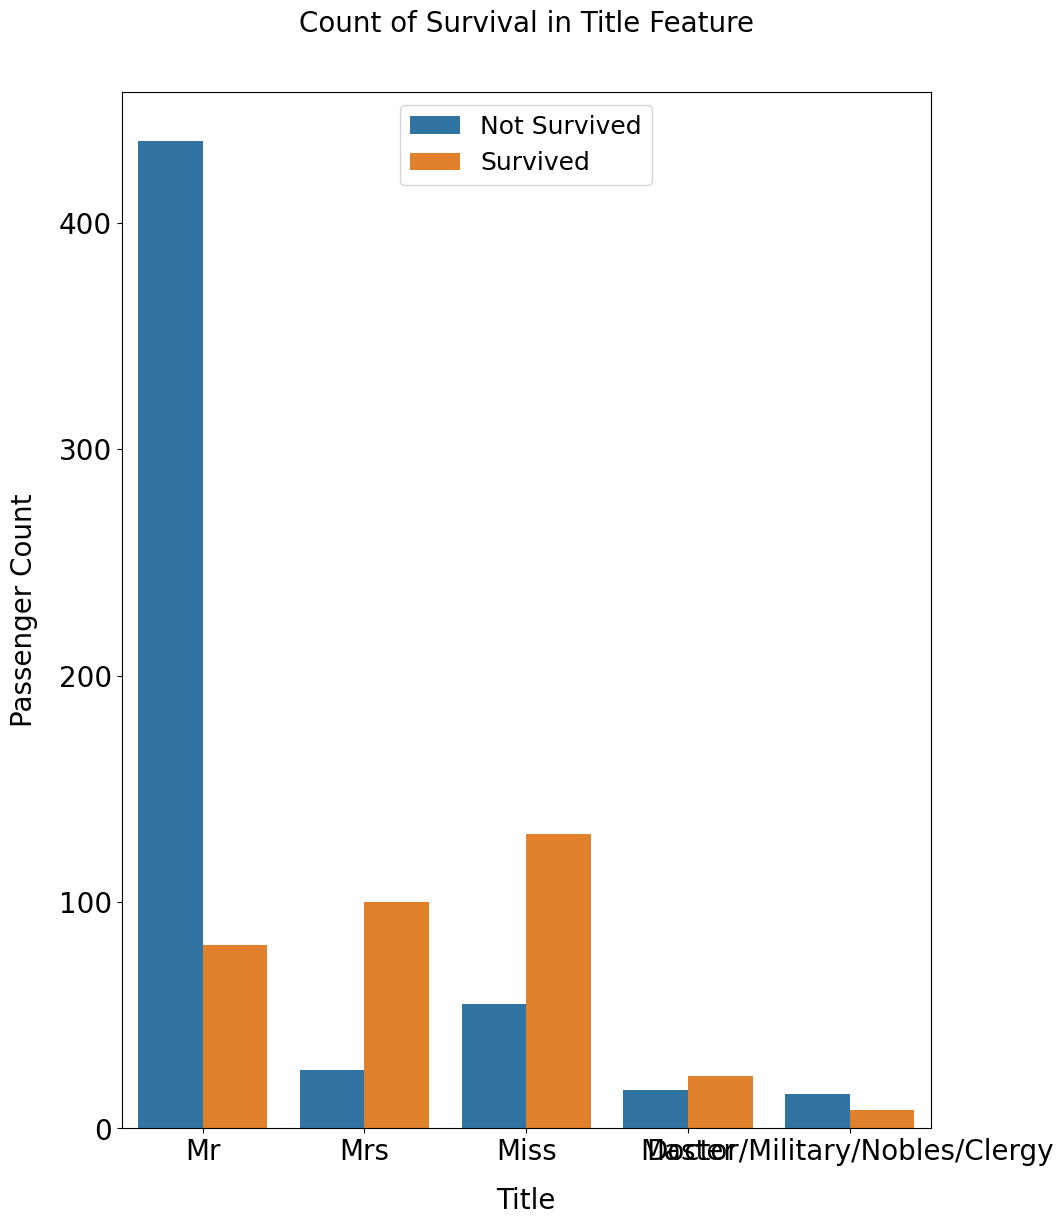

In [54]:
cat_features = ['Title']

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=train_data)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

Let's do the same to the test data.

In [55]:
test_data['Title'] = test_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
test_data.Title.value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [56]:
test_data.loc[test_data['Title'] == 'Ms']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Title
88,980,3,"O'Donoghue, Ms. Bridget",female,21.5,0,0,364856,263.0,M,Q,M,1,Ms


I will handle the titles the same I did in the train data:

* The title `Ms` does not specify if a woman is married or not - but since the only passenger that answers this title has no family (the `FamilySize = 1`), I will assume she was unmarried, and replse `Ms` with `Miss`
* The other titles with less then 10 sample are military (`Col`), nobles (`Dona`), Clergy (`Rev`) and Doctor (`Dr`), so I will unite these values to `Doctor/Military/Nobles/Clergy`

In [57]:
test_data.loc[test_data['Title'] == 'Ms', 'Title'] = 'Miss'

values_to_replace = ['Dr', 'Rev', 'Col', 'Dona']
# Define the replacement value
new_value = 'Doctor/Military/Nobles/Clergy'
# Replace values in column 'A' with new_value if they are in values_to_replace list
test_data['Title'] = test_data['Title'].replace(values_to_replace, new_value)
test_data.Title.value_counts()

Title
Mr                               240
Miss                              79
Mrs                               72
Master                            21
Doctor/Military/Nobles/Clergy      6
Name: count, dtype: int64

## 3. Fit Models

For this classification I will try a few models:
* Decision Tree
* Random Forest
* Logistic Regression
* XGBoost

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,M,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,M,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,M,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,M,S,M,1,Doctor/Military/Nobles/Clergy
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,M,S,M,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1,Mr


In [60]:
train_data.SibSp.value_counts(), test_data.SibSp.value_counts()

(SibSp
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: count, dtype: int64,
 SibSp
 0    283
 1    110
 2     14
 3      4
 4      4
 8      2
 5      1
 Name: count, dtype: int64)

In [61]:
train_data.loc[train_data['Parch'] >= 3, 'Parch'] = '3 Or More'
train_data.Parch.value_counts()#, test_data.Parch.value_counts()

/tmp/ipykernel_18/3887010693.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3 Or More' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[train_data['Parch'] >= 3, 'Parch'] = '3 Or More'


Parch
0            678
1            118
2             80
3 Or More     15
Name: count, dtype: int64

In [62]:
test_data.loc[test_data['Parch'] >= 3, 'Parch'] = '3 Or More'
test_data.Parch.value_counts()#, test_data.Parch.value_counts()

/tmp/ipykernel_18/3698967941.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3 Or More' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[test_data['Parch'] >= 3, 'Parch'] = '3 Or More'


Parch
0            324
1             52
2             33
3 Or More      9
Name: count, dtype: int64

### 3.0 Prepare The Train Set for Fitting

Since we have categorical values in the dataset, and since they are not nominal,we need to add dummy variables to the dataset.

I also want to test a few models before submission, therefore, I will split the dataset into train and validation sets (using scikit-learn `train_test_split`. 20% of the data will be valdiation set, and the rest will be the training set.

In [63]:
y_train = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(data = train_data, columns = ['Pclass', 'Embarked', 'Deck', 'FamilySize', 'Title', 'Sex', 'SibSp', 'Parch'], dtype = int)
X_train['Age'] = train_data['Age']
X_train['Fare'] = train_data['Fare']
X_train.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)

# X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [64]:
X_train

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3 Or More
0,22.0,7.2500,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,35.0,53.1000,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
4,35.0,8.0500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
887,19.0,30.0000,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
888,21.5,23.4500,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
889,26.0,30.0000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# features = ["Pclass", "Sex", "SibSp", "Parch"]
X_test = pd.get_dummies(data = test_data, columns = ['Pclass', 'Embarked', 'Deck', 'FamilySize', 'Title', 'Sex', 'SibSp', 'Parch'], dtype = int)
X_test['Age'] = test_data['Age']
X_test['Fare'] = test_data['Fare']
X_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace = True)
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3 Or More
0,34.5,7.2500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47.0,71.2833,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,62.0,7.9250,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27.0,53.1000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,22.0,8.0500,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
414,39.0,7.9250,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,38.5,8.0500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
416,25.0,32.5000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### 3.1 Fit Random Forest Classifier

In [66]:
# Random Forest
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

rf_model = RandomForestClassifier(random_state = 42)

In [67]:
n_folds = 5

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation for AUC
auc_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='roc_auc')

print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean AUC Score:", np.mean(auc_scores))

Mean Accuracy: 0.8092084614901763
Mean AUC Score: 0.8625023527666839


### 3.2 Fit Logistic Regression Classifier

In [68]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
n_folds = 5

# Initialize KFold with shuffle=True
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
accuracy_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation for AUC
auc_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='roc_auc')

print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean AUC Score:", np.mean(auc_scores))

Mean Accuracy: 0.8271734354403366
Mean AUC Score: 0.8666202356943342


### 3.3 Fit XGBoost Classifier

In [69]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)
# Define the number of folds for cross-validation
n_folds = 5

# Initialize KFold with shuffle=True
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
accuracy_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

# Perform cross-validation for AUC
auc_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=kf, scoring='roc_auc')

print("Mean Accuracy:", np.mean(accuracy_scores))
print("Mean AUC Score:", np.mean(auc_scores))

Mean Accuracy: 0.8226790534178645
Mean AUC Score: 0.8647090116849727


### 3.4 Prepare the Test Set

In [70]:
X_test

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Deck_A,Deck_B,...,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3 Or More
0,34.5,7.2500,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,47.0,71.2833,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,62.0,7.9250,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27.0,53.1000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,22.0,8.0500,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,0.0000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
414,39.0,7.9250,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
415,38.5,8.0500,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
416,25.0,32.5000,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
total_missing = test_data.isnull().sum().sum()

# Display total missing values
print("Total missing values:", total_missing)

Total missing values: 0


## 4 Predict Using Chosen Model and Prepare Submission

The model I chose is Random Forrest since it had the highest accuracy on the validation set.

In [72]:
lr_model.fit(X_train, y_train)
predictions = lr_model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
